# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys_use import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date= []
city_name = []
counter=0


# Loop through the list of cities and perform a request for data on each

print("--------------------------")
print("Begin Data Retriaval")
print("--------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        counter = counter + 1
        print(f"Processing Record # {counter}: {city} ")
    except KeyError:
            print("City not found, Skipping")
print("--------------------------")
print("Data Retriaval Complete")
print("--------------------------")
    

--------------------------
Begin Data Retriaval
--------------------------
Processing Record # 1: punta arenas 
Processing Record # 2: busselton 
Processing Record # 3: qasigiannguit 
Processing Record # 4: tasiilaq 
Processing Record # 5: ushuaia 
Processing Record # 6: klaksvik 
Processing Record # 7: sao joao da barra 
City not found, Skipping
Processing Record # 8: bredasdorp 
Processing Record # 9: bud 
City not found, Skipping
Processing Record # 10: dikson 
Processing Record # 11: port lincoln 
City not found, Skipping
Processing Record # 12: mar del plata 
Processing Record # 13: yanam 
Processing Record # 14: atuona 
Processing Record # 15: vaini 
Processing Record # 16: vestmannaeyjar 
Processing Record # 17: bluff 
Processing Record # 18: hermanus 
Processing Record # 19: sembabule 
Processing Record # 20: yeniseysk 
Processing Record # 21: kodiak 
Processing Record # 22: hasaki 
Processing Record # 23: bonavista 
Processing Record # 24: thompson 
Processing Record # 25: lon

Processing Record # 221: laukaa 
Processing Record # 222: darhan 
Processing Record # 223: airai 
City not found, Skipping
Processing Record # 224: teguldet 
Processing Record # 225: linkou 
Processing Record # 226: dicabisagan 
Processing Record # 227: yeppoon 
Processing Record # 228: abeche 
Processing Record # 229: albacete 
Processing Record # 230: hong gai 
Processing Record # 231: grand gaube 
Processing Record # 232: taybad 
Processing Record # 233: los llanos de aridane 
Processing Record # 234: namatanai 
Processing Record # 235: cidreira 
Processing Record # 236: san cristobal 
Processing Record # 237: saint-philippe 
Processing Record # 238: wuwei 
Processing Record # 239: aquiraz 
Processing Record # 240: tahoua 
Processing Record # 241: asfi 
City not found, Skipping
Processing Record # 242: torbay 
Processing Record # 243: riyadh 
Processing Record # 244: sioux lookout 
Processing Record # 245: itoman 
Processing Record # 246: srebrenik 
Processing Record # 247: gat 
Pro

Processing Record # 442: bhatgaon 
Processing Record # 443: kabinda 
Processing Record # 444: rancho palos verdes 
Processing Record # 445: chumphon 
Processing Record # 446: lompoc 
Processing Record # 447: sur 
Processing Record # 448: marquette 
Processing Record # 449: brentwood 
Processing Record # 450: guanica 
Processing Record # 451: sangar 
Processing Record # 452: broome 
City not found, Skipping
Processing Record # 453: kapiri mposhi 
Processing Record # 454: pryazha 
City not found, Skipping
Processing Record # 455: sydney 
Processing Record # 456: las vegas 
Processing Record # 457: fenoarivo atsinanana 
Processing Record # 458: taunggyi 
Processing Record # 459: dzhida 
City not found, Skipping
Processing Record # 460: broken hill 
Processing Record # 461: umm kaddadah 
Processing Record # 462: krynychky 
Processing Record # 463: vao 
Processing Record # 464: moron 
Processing Record # 465: mayya 
Processing Record # 466: mayahi 
Processing Record # 467: martil 
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities and other data stored in last step
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity" : humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.index.name = "City_ID"

#exporting to csv
weather_data.to_csv(output_data_file)


#display
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Punta Arenas,-53.1500,-70.9167,7.06,57,75,6.69,CL,1624128629
1,Busselton,-33.6500,115.3333,13.38,82,100,4.89,AU,1624128398
2,Qasigiannguit,68.8193,-51.1922,4.22,65,100,1.57,GL,1624128629
3,Tasiilaq,65.6145,-37.6368,3.13,68,100,2.00,GL,1624128629
4,Ushuaia,-54.8000,-68.3000,5.81,75,75,8.23,AR,1624128630


In [6]:
# Generate a summary statistics table of count, mean, standard deviation, 25%, 50%, 75% and max 
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,5.900000e+02
mean,19.048416,13.917302,20.802203,67.705085,53.350847,3.612881,1.624129e+09
std,33.475056,88.532011,8.393001,21.937815,39.826414,2.510231,7.425609e+01
min,-54.800000,-179.166700,-0.340000,1.000000,0.000000,0.000000,1.624128e+09
25%,-8.134500,-64.892100,15.295000,56.000000,11.000000,1.792500,1.624129e+09
50%,22.426100,20.001100,21.780000,72.000000,57.000000,3.090000,1.624129e+09
75%,46.042500,83.980400,26.987500,84.000000,99.000000,4.920000,1.624129e+09
max,78.218600,178.416700,43.430000,100.000000,100.000000,17.980000,1.624129e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#cities that have humidity > 100%
high_humidity= weather_data.loc[(weather_data['Humidity']> 100) ]
high_humidity
#no city had humidity higher than 100%, skipping step

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

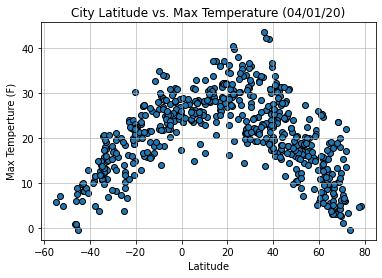

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(weather_data["Lat"],weather_data["Max Temp"],edgecolor="black")
plt.ylabel("Max Temperture (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.grid(alpha=0.75)
plt.show()
plt.savefig('output_data/Lat_vs_Temp.png')

Analysis: Looks like there is a parabolic relationship between latitude and max temp. Which is why it woould be useful to split analysis b/w northern and southern hemisphere

## Latitude vs. Humidity Plot

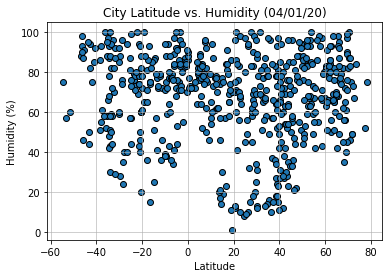

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"],edgecolor="black")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.grid(alpha=0.75)
plt.show()
plt.savefig('output_data/Lat_vs_Humidity.png')

Analysis: Does not look like there is a linear realationship b/w humidity and the latitude. However, looking at 0 degrees latitude (equator) it looks like those cities are clustering towards high humdity levels

## Latitude vs. Cloudiness Plot

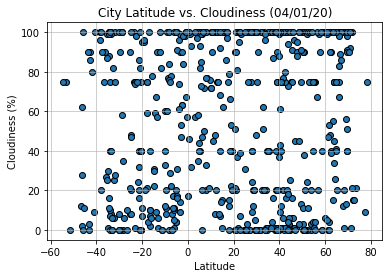

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"],edgecolor="black")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.grid(alpha=0.75)
plt.show()
plt.savefig('output_data/Lat_vs_Cloudiness.png')

Analysis: It does not look like there is a linear relationship between cloudiness and latitude. it would be interesting to see how are humidity and cloudiness related. In this scatter plot it seems like either cities have high cloudiness or low, fewer points show in the middle range

## Latitude vs. Wind Speed Plot

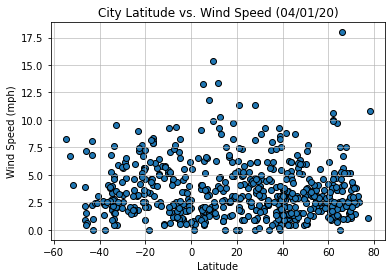

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"],edgecolor="black")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.grid(alpha=0.75)
plt.show()
plt.savefig('output_data/Lat_vs_WindSpeed.png')

Analysis: There seems to be some correlation b/w speed and latitude, but not the strongest. A linear regression may help with more definitive answers. 

## Linear Regression

In [12]:
#dividing data sets into two smaller ones for ease of analysis
north_hem=weather_data.loc[(weather_data['Lat']>= 0) ]
south_hem=weather_data.loc[(weather_data['Lat']< 0) ]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6934803769022476
The p-value is: 4.609791905093007e-58


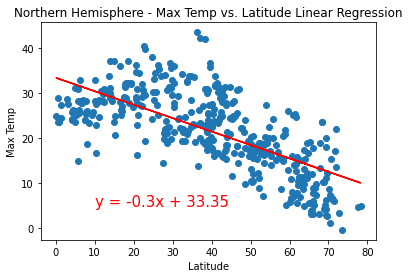

In [13]:
#linear regression model 
x_values=north_hem["Lat"]
y_values=north_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()


Analysis: 
R value is showing that the correlation coefficient is -0.69, meaning there is a negative correlation b/w max temp and latitude. i.e. if latitude increase, the max temp is likely be lower. In layman terms, as we go further away from the equator towards north, max temps are likely to be lower, therefore, gets colder. 
The p value is also very low, indicating that this relationship is significant based on this data set.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.810722775317935
The p-value is: 1.6029611132344288e-46


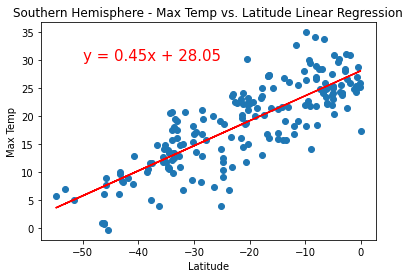

In [14]:
#linear regression model 
x_values=south_hem["Lat"]
y_values=south_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()


Analysis: R value is showing that the correlation coefficient is +0.81, meaning there is a positive correlation b/w max temp and latitude. i.e. if latitude increases, the max temp is likely be higher. In layman terms, as we go closer to the equator, max temps are likely to be higher, therefore, gets hotter. The p value is also very low, indicating that this relationship is significant based on this data set.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07421235031722377
The p-value is: 0.14043524872608842


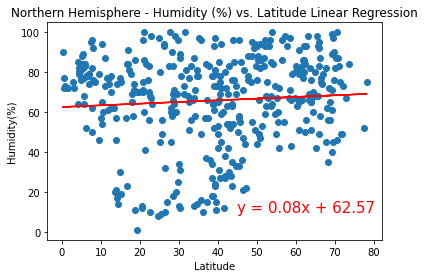

In [15]:
#linear regression model 
x_values=north_hem["Lat"]
y_values=north_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

Analysis: R value is showing that the correlation coefficient is +0.07, meaning there is a slight positive correlation b/w humidity and latitude. The p value is also high, indicating that this relationship is not significant based on this data set.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04831020784500631
The p-value is: 0.5035429655826843


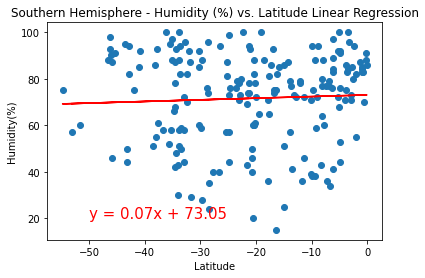

In [17]:
#linear regression model 
x_values=south_hem["Lat"]
y_values=south_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

Analysis: R value is showing that the correlation coefficient is 0.04, meaning there is a slight positive correlation b/w humidity and latitude. The p value is also high, indicating that this relationship is not significant based on this data set.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.003722139945808347
The p-value is: 0.9411410727801008


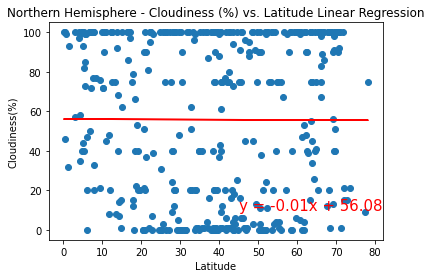

In [18]:
#linear regression model 
x_values=north_hem["Lat"]
y_values=north_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

Analysis: R value is showing that the correlation coefficient is -0.003, meaning there is a slight negative correlation b/w cloudiness and latitude. The p value is also high, indicating that this relationship is not significant based on this data set.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03882052768972617
The p-value is: 0.5909804904581684


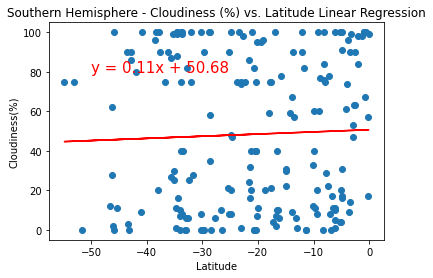

In [19]:
#linear regression model 
x_values=south_hem["Lat"]
y_values=south_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

Analysis: R value is showing that the correlation coefficient is +0.11, meaning there is a positive correlation b/w cloudiness and latitude. The p value is also high, indicating that this relationship is not significant based on this data set.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.06062461019895389
The p-value is: 0.22870235366276387


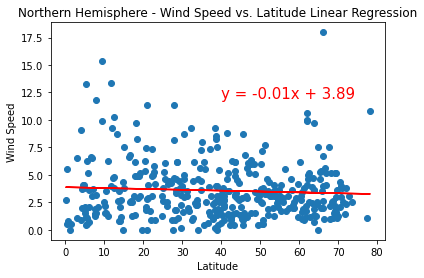

In [20]:
#linear regression model 
x_values=north_hem["Lat"]
y_values=north_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()

Analysis: R value is showing that the correlation coefficient is -0.06, meaning there is a negative correlation b/w wind speed and latitude. The p value is also less than 0.05, indicating that this relationship is significant based on this data set.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.006627792413949821
The p-value is: 0.9269213872113111


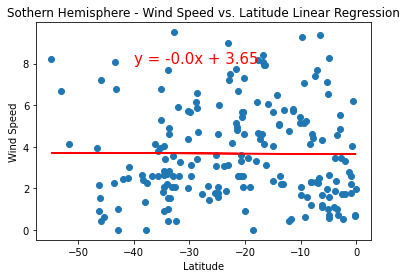

In [22]:
#linear regression model 
x_values=south_hem["Lat"]
y_values=south_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Sothern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()

Analysis: R value is showing that the correlation coefficient is -0.06, meaning there is a slight negative correlation b/w cloudiness and latitude. The p value is high, indicating that this relationship is not significant based on this data set.

Over all these conclusions can be made:

    *Cities near the equator are hotter than the ones further away from the eqautor.
    
    *Humidity does not seem to have a relationship how far/close the city is from the equator.
    
    *Cloudiness does not seem to have a relationship how far/close the city is from the equator.
    
    *Windspeed does not seem to have a relationship how far/close the city is from the equator.